In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import h5py
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tqdm
import os
import cv2

In [5]:
file = h5py.File('/content/drive/My Drive/aug_dataset.hdf5',mode = 'r')

In [6]:
N_dataset_x_train = file['N_dataset_x_train'][:700]
N_dataset_y_train = file['N_dataset_y_train'][:700]
N_dataset_x_val = file['N_dataset_x_val'][:200]
N_dataset_y_val = file['N_dataset_y_val'][:200]
N_dataset_x_test = file['N_dataset_x_test'][:100]
N_dataset_y_test = file['N_dataset_y_test'][:100]

In [7]:
G_dataset_x_train = file['G_dataset_x_train'][:700]
G_dataset_y_train = file['G_dataset_y_train'][:700]
G_dataset_x_val = file['G_dataset_x_val'][:200]
G_dataset_y_val = file['G_dataset_y_val'][:200]
G_dataset_x_test = file['G_dataset_x_test'][:100]
G_dataset_y_test = file['G_dataset_y_test'][:100]

In [8]:
C_dataset_x_train = file['C_dataset_x_train'][:700]
C_dataset_y_train = file['C_dataset_y_train'][:700]
C_dataset_x_val = file['C_dataset_x_val'][:200]
C_dataset_y_val = file['C_dataset_y_val'][:200]
C_dataset_x_test = file['C_dataset_x_test'][:100]
C_dataset_y_test = file['C_dataset_y_test'][:100]

In [9]:
A_dataset_x_train = file['A_dataset_x_train'][:700]
A_dataset_y_train = file['A_dataset_y_train'][:700]
A_dataset_x_val = file['A_dataset_x_val'][:200]
A_dataset_y_val = file['A_dataset_y_val'][:200]
A_dataset_x_test = file['A_dataset_x_test'][:100]
A_dataset_y_test = file['A_dataset_y_test'][:100]

In [10]:
H_dataset_x_train = file['H_dataset_x_train'][:700]
H_dataset_y_train = file['H_dataset_y_train'][:700]
H_dataset_x_val = file['H_dataset_x_val'][:200]
H_dataset_y_val = file['H_dataset_y_val'][:200]
H_dataset_x_test = file['H_dataset_x_test'][:100]
H_dataset_y_test = file['H_dataset_y_test'][:100]

In [11]:
M_dataset_x_train = file['M_dataset_x_train'][:700]
M_dataset_y_train = file['M_dataset_y_train'][:700]
M_dataset_x_val = file['M_dataset_x_val'][:200]
M_dataset_y_val = file['M_dataset_y_val'][:200]
M_dataset_x_test = file['M_dataset_x_test'][:100]
M_dataset_y_test = file['M_dataset_y_test'][:100]

In [12]:
D_dataset_x_train = file['D_dataset_x_train'][:]
D_dataset_y_train = file['D_dataset_y_train'][:]
D_dataset_x_val = file['D_dataset_x_val'][:]
D_dataset_y_val = file['D_dataset_y_val'][:]
D_dataset_x_test = file['D_dataset_x_test'][:]
D_dataset_y_test = file['D_dataset_y_test'][:]

In [13]:
for i in range(len(D_dataset_y_train)):
    D_dataset_y_train[i] = 1
for i in range(len(D_dataset_y_val)):
    D_dataset_y_val[i] = 1
for i in range(len(D_dataset_y_test)):
    D_dataset_y_test[i] = 1

for i in range(len(N_dataset_y_train)):
    N_dataset_y_train[i] = 0
for i in range(len(N_dataset_y_val)):
    N_dataset_y_val[i] = 0
for i in range(len(N_dataset_y_test)):
    N_dataset_y_test[i] = 0
for i in range(len(G_dataset_y_train)):
    G_dataset_y_train[i] = 0
for i in range(len(G_dataset_y_val)):
    G_dataset_y_val[i] = 0
for i in range(len(G_dataset_y_test)):
    G_dataset_y_test[i] = 0
for i in range(len(C_dataset_y_train)):
    C_dataset_y_train[i] = 0
for i in range(len(C_dataset_y_val)):
    C_dataset_y_val[i] = 0
for i in range(len(C_dataset_y_test)):
    C_dataset_y_test[i] = 0
for i in range(len(A_dataset_y_train)):
    A_dataset_y_train[i] = 0
for i in range(len(A_dataset_y_val)):
    A_dataset_y_val[i] = 0
for i in range(len(A_dataset_y_test)):
    A_dataset_y_test[i] = 0
for i in range(len(H_dataset_y_train)):
    H_dataset_y_train[i] = 0
for i in range(len(H_dataset_y_val)):
    H_dataset_y_val[i] = 0
for i in range(len(H_dataset_y_test)):
    H_dataset_y_test[i] = 0

for i in range(len(M_dataset_y_train)):
    M_dataset_y_train[i] = 0
for i in range(len(M_dataset_y_val)):
    M_dataset_y_val[i] = 0
for i in range(len(M_dataset_y_test)):
    M_dataset_y_test[i] = 0

In [14]:
y_train = np.concatenate(( N_dataset_y_train,D_dataset_y_train,G_dataset_y_train,C_dataset_y_train,H_dataset_y_train,M_dataset_y_train,A_dataset_y_train))
y_val = np.concatenate((N_dataset_y_val,D_dataset_y_val,G_dataset_y_val,C_dataset_y_val,H_dataset_y_val,M_dataset_y_val,A_dataset_y_val))
y_test = np.concatenate((N_dataset_y_test,D_dataset_y_test,G_dataset_y_test,C_dataset_y_test,H_dataset_y_test,M_dataset_y_test,A_dataset_y_test))

In [15]:
x_train = np.concatenate(( N_dataset_x_train,D_dataset_x_train,G_dataset_x_train,C_dataset_x_train,H_dataset_x_train,M_dataset_x_train,A_dataset_x_train))
x_val = np.concatenate((N_dataset_x_val,D_dataset_x_val,G_dataset_x_val,C_dataset_x_val,H_dataset_x_val,M_dataset_x_val,A_dataset_x_val))
x_test = np.concatenate((N_dataset_x_test,D_dataset_x_test,G_dataset_x_test,C_dataset_x_test,H_dataset_x_test,M_dataset_x_test,A_dataset_x_test))

In [16]:
del N_dataset_x_train
del N_dataset_y_train
del N_dataset_x_val
del N_dataset_y_val
del N_dataset_x_test
del N_dataset_y_test
del A_dataset_x_train
del A_dataset_y_train
del A_dataset_x_val
del A_dataset_y_val
del A_dataset_x_test
del A_dataset_y_test
del D_dataset_x_train
del D_dataset_y_train
del D_dataset_x_val
del D_dataset_y_val
del D_dataset_x_test
del D_dataset_y_test
del G_dataset_x_train
del G_dataset_y_train
del G_dataset_x_val
del G_dataset_y_val
del G_dataset_x_test
del G_dataset_y_test
del C_dataset_x_train
del C_dataset_y_train
del C_dataset_x_val
del C_dataset_y_val
del C_dataset_x_test
del C_dataset_y_test
del H_dataset_x_train
del H_dataset_y_train
del H_dataset_x_val
del H_dataset_y_val
del H_dataset_x_test
del H_dataset_y_test
del M_dataset_x_train
del M_dataset_y_train
del M_dataset_x_val
del M_dataset_y_val
del M_dataset_x_test
del M_dataset_y_test

In [17]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')


x_train/=255
x_val/=255
x_test /= 255

In [18]:
vgg = VGG19(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [28]:
for layer in vgg.layers:
    layer.trainable = False

In [29]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/weights_weights_ND.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=True,)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [32]:
history = model.fit(x_train,y_train, batch_size = 64, epochs = 50,validation_data=(x_val,y_val),shuffle = True,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/50
99/99 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.7904
Epoch 00001: val_accuracy improved from -inf to 0.83198, saving model to /content/drive/My Drive/weights_weights_ND.h5
99/99 [==============================] - 41s 418ms/step - loss: 0.4091 - accuracy: 0.7904 - val_loss: 0.3295 - val_accuracy: 0.8320
Epoch 2/50
99/99 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8419
Epoch 00002: val_accuracy improved from 0.83198 to 0.84589, saving model to /content/drive/My Drive/weights_weights_ND.h5
99/99 [==============================] - 40s 400ms/step - loss: 0.3179 - accuracy: 0.8419 - val_loss: 0.3073 - val_accuracy: 0.8459
Epoch 3/50
99/99 [==============================] - ETA: 0s - loss: 0.2902 - accuracy: 0.8592
Epoch 00003: val_accuracy improved from 0.84589 to 0.84820, saving model to /content/drive/My Drive/weights_weights_ND.h5
99/99 [==============================] - 41s 414ms/step - loss: 0.2902 - accuracy: 0.8592 -

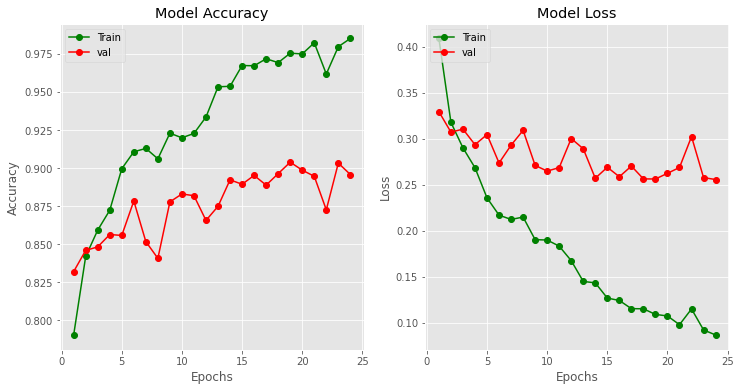

In [33]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,len(history.history['accuracy'])+1)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

In [34]:
model.load_weights('/content/drive/My Drive/weights_weights_ND.h5')

In [ ]:
model.evaluate(x_test,y_test)

In [37]:
N_dataset_x_test = file['N_dataset_x_test'][:]
N_dataset_x_test = N_dataset_x_test[:100]
D_dataset_x_test = file['D_dataset_x_test'][:]
D_dataset_x_test = D_dataset_x_test[:100]
G_dataset_x_test = file['G_dataset_x_test'][:]
G_dataset_x_test = G_dataset_x_test[:100]
C_dataset_x_test = file['C_dataset_x_test'][:]
C_dataset_x_test = C_dataset_x_test[:100]
A_dataset_x_test = file['A_dataset_x_test'][:]
A_dataset_x_test = A_dataset_x_test[:100]
H_dataset_x_test = file['H_dataset_x_test'][:]
H_dataset_x_test = H_dataset_x_test[:100]
M_dataset_x_test = file['M_dataset_x_test'][:]
M_dataset_x_test = M_dataset_x_test[:100]
x_test = np.concatenate((N_dataset_x_test,D_dataset_x_test,G_dataset_x_test,C_dataset_x_test,A_dataset_x_test,H_dataset_x_test,M_dataset_x_test))
pred_res = []
for image in x_test:
    image = image.astype('float32')
    image/=255
    image = np.expand_dims(image, axis=0)
    score = model.predict(image)
    if score[0][0] > 0.5:
      pred_res.append(1)
    else:
      pred_res.append(0)
truth = [0]*(100) + [1] *100 + [0]*(100+100+100+100+100)
counter = 0
for a,b in zip(pred_res,truth):
  if a == b:
    counter += 1
print('accuracy is %f' %(counter/len(truth)))

accuracy is 0.904286
